# Cesium 5D5/2 lifetime measurement

+ **author   :** Alexandre Dareau
+ **created  :** 2019-12-19
+ **language :** Python 3.6.7

Test for a binder notebook

## Imports

In [7]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from notebook_functions import *

## Load data

In [13]:
# -- Settings
data_folder = 'data'
measurement = 'S132_20191106_A'

# -- Load
# define path
measurement_folder_path = os.path.join('.', data_folder, measurement)
# display infos from .json
infos = get_file_info(measurement_folder_path)
cycle = infos['cycle duration']['value']
# load fluo histogram
fluo_file = os.path.join(measurement_folder_path, 'histogram.npz')
fluo_data = np.load(fluo_file)
# load laser histogram
laser_file = os.path.join(measurement_folder_path, 'laser_histogram.npz')
laser_data = np.load(laser_file)

>> S132_20191106_A
  + temperature 	: 22.6 °C
  + cycle duration 	: 50 µs
  + photon / cycle 	: 0.104
  + tot. duration 	: 26.4 hours
  + photons collected 	: 2e+08
  + comments : cell had an angle compared to the beam direction


## Plot data

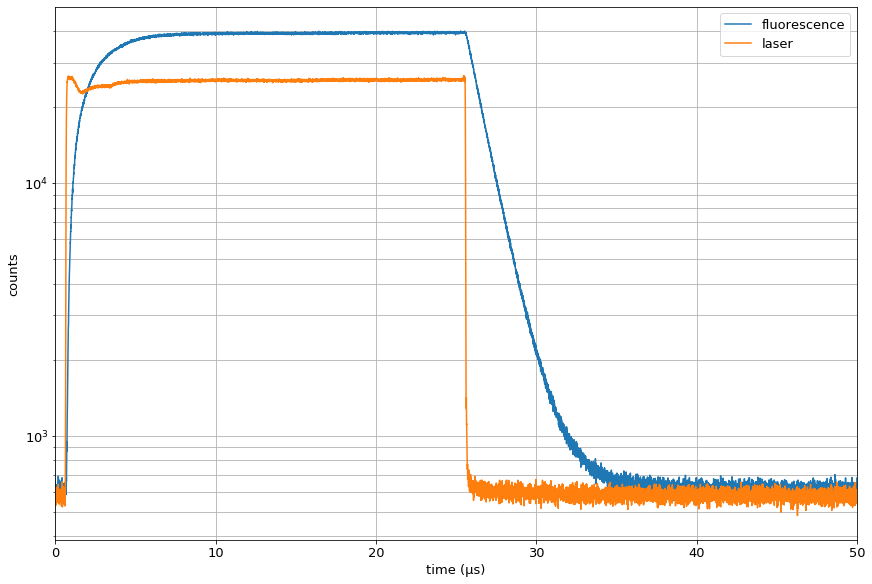

In [26]:
# -- Settings
fluo_params = {'color': '#1f77b4', 'markersize': 1}
laser_params = {'color': '#ff7f0e', 'markersize': 1}
semilog = True
xmin = 0
xmax = cycle

# -- Plot
# figure
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(1, 1, figsize=(12, 8), constrained_layout=True)
# plot
ax.plot(fluo_data['t'] * 1e-6, fluo_data['I'], label='fluorescence', **fluo_params)
ax.plot(laser_data['t'] * 1e-6, laser_data['I'], label='laser', **laser_params)
# setup
ax.set_xlabel('time (µs)')
ax.set_ylabel('counts')
ax.grid(which='both')
ax.set_xlim(xmin, xmax)
if semilog:
    ax.semilogy()
ax.legend()
# show
plt.show()